# Credit Risk Analysis Prediction

Let's work with the 'Credit Risk Dataset' from Kaggle. In this project, we will analyze and preprocess the data from numerous individuals and construct machine learning models to determine whether loans will be granted or not. We will test the 'Neural Network', 'Gradient Boosting', 'Random Forest', 'SVM', 'KNN', and 'Logistic Regression' models.

Dataset Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Summary

### Chapter 1: Exploratory Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Unique Values
- 1.4: Visual Analysis

### Chapter 2: Data Processing
- 2.1: Missing Values
- 2.2: Handling Outliers
- 2.3: Handling Data Types
- 2.4: Encoding Features
- 2.5: Splitting Data
- 2.6: Robust Scaling
- 2.7: Undersampling
- 2.8: SMOTE

### Chapter 3: Building Machine Learning Models
- 3.1: Logistic Regression
- 3.2: Random Forest
- 3.3: XGBoost
- 3.4: Gradient Boosting
- 3.5: Support Vector Machine (SVM)
- 3.6: K-Nearest Neighbors (KNN)
- 3.7: Neural Network

### Chapter 4: Testing Model and Conclusion
- 4.1: Testing Model

# Chapter 1 - Exploratory and Statistical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

- Feature Name:	                    Description
- person_age:	                    Age
- person_income:	                Annual Income
- person_home_ownership:	        Home ownership
- person_emp_length:	            Employment length (in years)
- loan_intent:	                    Loan intent
- loan_grade:	                    Loan grade
- loan_amnt:	                    Loan amount
- loan_int_rate:	                Interest rate
- loan_status:	                    Loan status (0 is non default 1 is default)
- loan_percent_income:	            Percent income
- cb_person_default_on_file:	    Historical default
- cb_preson_cred_hist_length:	    Credit history length

"loan_status" is our target class.

loan_status 0 = loan denied.

loan_status 1 = loan approved.

### 1.1: Importing Data and First Look

In [2]:
credit_df = pd.read_csv("credit_risk_dataset.csv")

credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
credit_df.describe() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 1.2: Checking Null Values

In [5]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 1.3: Checking Unique Values

In [6]:
binary_features = ['loan_status', 'cb_person_default_on_file']

for feature in binary_features:
    unique_values = credit_df[feature].unique()
    print(f"Unique values in '{feature}': {unique_values}")

Unique values in 'loan_status': [1 0]
Unique values in 'cb_person_default_on_file': ['Y' 'N']


In [7]:
ohe_features = ['person_home_ownership', 'loan_intent']

for feature in ohe_features:
    unique_values = credit_df[feature].unique()
    print(f"Unique values in '{feature}': {unique_values}")

Unique values in 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in 'loan_intent': ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [8]:
ordinal_features = credit_df['loan_grade']

print(f"Unique values in 'loan_grade': {ordinal_features.unique()}")

Unique values in 'loan_grade': ['D' 'B' 'C' 'A' 'E' 'F' 'G']


In [9]:
num_features = credit_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features = [col for col in num_features if col != 'loan_status']

num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

### 1.4: Visual Analysis

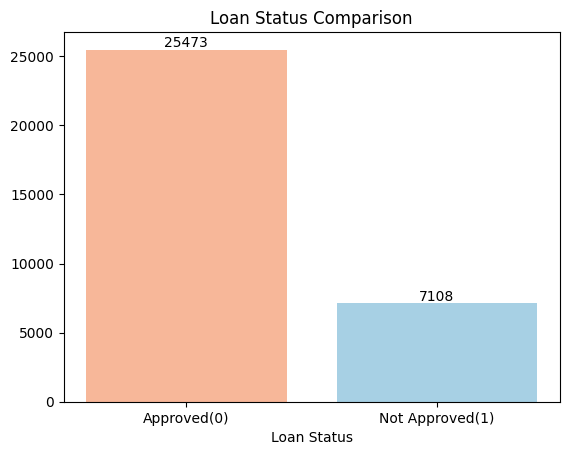

In [10]:
colors = sns.color_palette("RdBu", n_colors=2)

count_0 = credit_df['loan_status'].value_counts()[0]
count_1 = credit_df['loan_status'].value_counts()[1]

plt.bar(['Approved(0)', 'Not Approved(1)'], [count_0, count_1], color=colors)

plt.title('Loan Status Comparison')
plt.xlabel('Loan Status')

for i, count in enumerate([count_0, count_1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

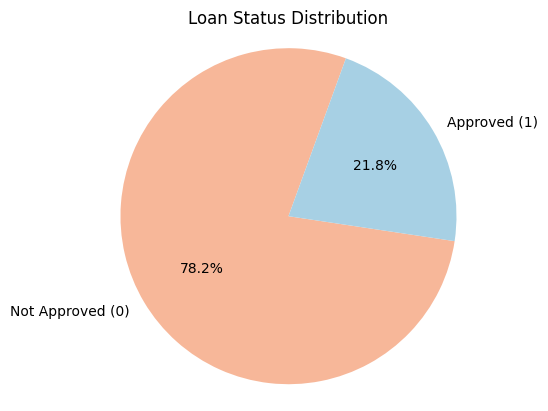

In [11]:
percentage_0 = (count_0 / len(credit_df)) * 100
percentage_1 = (count_1 / len(credit_df)) * 100

labels = ['Not Approved (0)', 'Approved (1)']
sizes = [percentage_0, percentage_1]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70, colors=colors)

plt.title('Loan Status Distribution')

plt.axis('equal')  
plt.show()

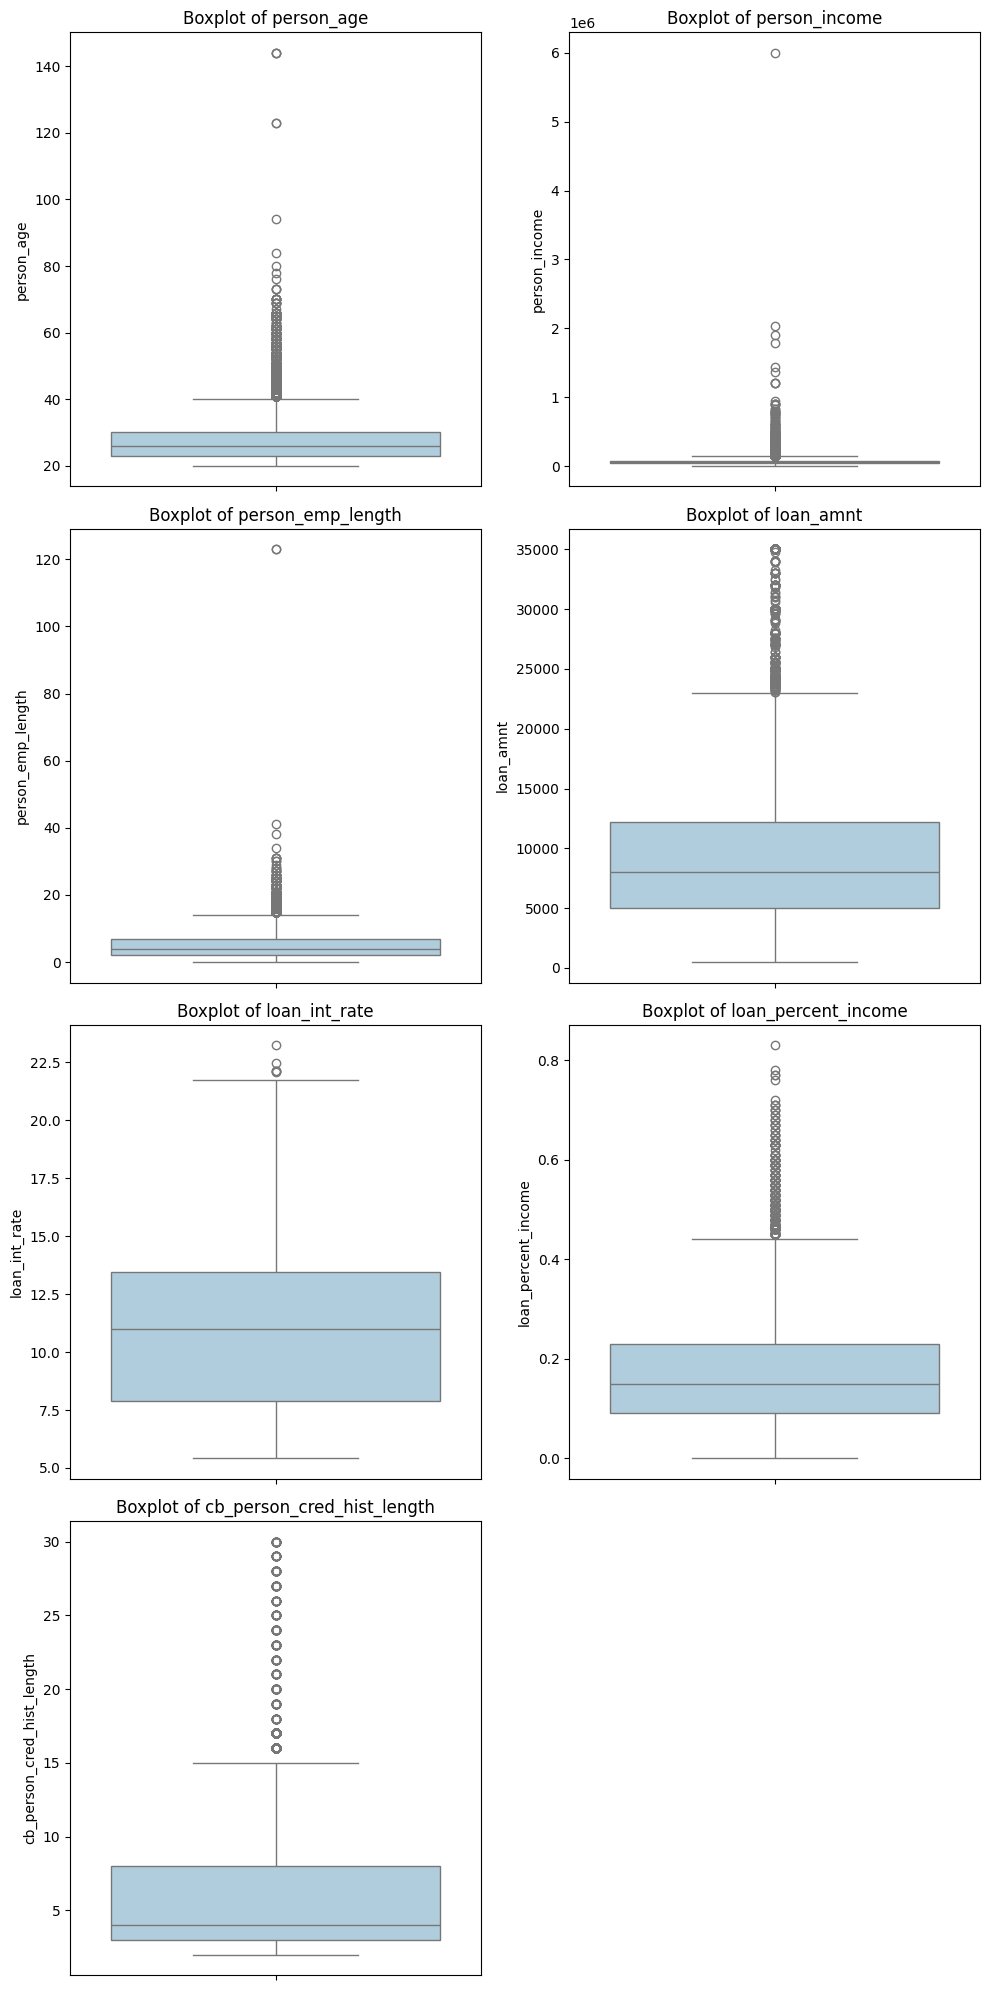

In [12]:
import math

n_cols = 2
n_rows = math.ceil(len(num_features) / n_cols)

plt.figure(figsize=(5*n_cols, 5*n_rows))

for i, col in enumerate(num_features):
    plt.subplot(n_rows, n_cols, i+1)  # posição do subplot
    sns.boxplot(y=credit_df[col], color=colors[1])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # ajusta os espaços para não sobrepor títulos
plt.show()

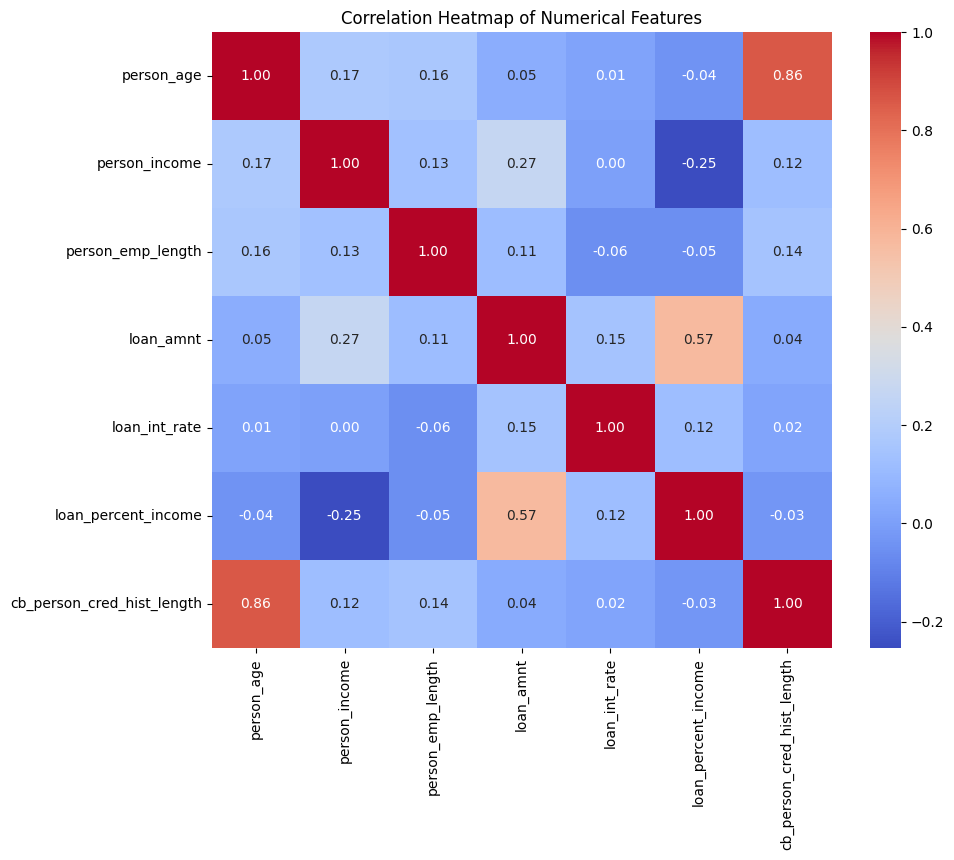

In [47]:
corr_matrix = credit_df[num_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Chapter 2: Data Processing

In [13]:
credit_df_clean = credit_df.copy()

### 2.1: Missing Values 

In [14]:
from functions import replace_nan_with_median

replace_nan_with_median(credit_df_clean, 'person_emp_length')

In [15]:
replace_nan_with_median(credit_df_clean, 'loan_int_rate')

credit_df_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2.2: Handling Outliers

Since it’s practically impossible for a person to be over 120 years old or employed for more than 120 years, we have decided to remove the outliers identified in the previous step.

In [16]:
from functions import remove_values_above_max

remove_values_above_max(credit_df_clean, 'person_emp_length', 100)
credit_df_clean['person_emp_length'].max()

np.float64(41.0)

### 2.3: Handling Data Types

In [17]:
from functions import transform_values

transform_values(credit_df_clean, 'cb_person_default_on_file', {'Y': True, 'N': False})

credit_df_clean['cb_person_default_on_file'].unique()

array([False,  True])

### 2.4: Encoding Features

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first') 

ohe_encoded = ohe.fit_transform(credit_df_clean[ohe_features])

ohe_df = pd.DataFrame(
    ohe_encoded, 
    columns=ohe.get_feature_names_out(ohe_features), 
    index=credit_df_clean.index 
)

credit_df_clean = pd.concat([credit_df_clean.drop(columns=ohe_features), ohe_df], axis=1)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
ord_enc = OrdinalEncoder(categories=[grade_order])

credit_df_clean['loan_grade'] = ord_enc.fit_transform(credit_df_clean[['loan_grade']])

credit_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32579 entries, 1 to 32580
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32579 non-null  int64  
 1   person_income                32579 non-null  int64  
 2   person_emp_length            32579 non-null  float64
 3   loan_grade                   32579 non-null  float64
 4   loan_amnt                    32579 non-null  int64  
 5   loan_int_rate                32579 non-null  float64
 6   loan_status                  32579 non-null  int64  
 7   loan_percent_income          32579 non-null  float64
 8   cb_person_default_on_file    32579 non-null  bool   
 9   cb_person_cred_hist_length   32579 non-null  int64  
 10  person_home_ownership_OTHER  32579 non-null  float64
 11  person_home_ownership_OWN    32579 non-null  float64
 12  person_home_ownership_RENT   32579 non-null  float64
 13  loan_intent_EDUCATION

### 2.5: Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

X = credit_df_clean.drop('loan_status', axis=1) 
y = credit_df_clean['loan_status']  

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (19547, 17) (19547,)
Shape of validation set: (6516, 17) (6516,)
Shape of test set: (6516, 17) (6516,)


### 2.6: Robust Scaling

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])

X_val[num_features] = scaler.transform(X_val[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### 2.7: Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of the training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of the training set after undersampling: (8512, 17) (8512,)


In [23]:
pd.Series(y_train_us).value_counts()

loan_status
0    4256
1    4256
Name: count, dtype: int64

### 2.8: SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of the training set after SMOTE:", X_train_smote.shape, y_train_smote.shape)

Shape of the training set after SMOTE: (30582, 17) (30582,)


In [25]:
pd.Series(y_train_smote).value_counts()

loan_status
0    15291
1    15291
Name: count, dtype: int64

# Chapter 3: Building Machine Learning Models

In [26]:
from functions import evaluate_classifier

### 3.1: Logistic Regression

- Normal

In [27]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)

evaluate_classifier(X_train, y_train, X_val, y_val, model=logreg_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.87      0.95      0.91     15291
       Churn       0.73      0.50      0.60      4256

    accuracy                           0.85     19547
   macro avg       0.80      0.73      0.75     19547
weighted avg       0.84      0.85      0.84     19547

AUC-ROC (Train): 0.8648304349258471


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.88      0.95      0.91      5086
       Churn       0.74      0.55      0.63      1430

    accuracy                           0.86      6516
   macro avg       0.81      0.75      0.77      6516
weighted avg       0.85      0.86      0.85      6516

AUC-ROC (Test): 0.8730881976851306


- Undersampling

In [28]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=logreg_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.79      0.80      0.79      4256
       Churn       0.79      0.79      0.79      4256

    accuracy                           0.79      8512
   macro avg       0.79      0.79      0.79      8512
weighted avg       0.79      0.79      0.79      8512

AUC-ROC (Train): 0.8684900065895471


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.79      0.85      5086
       Churn       0.51      0.80      0.62      1430

    accuracy                           0.79      6516
   macro avg       0.72      0.79      0.74      6516
weighted avg       0.84      0.79      0.80      6516

AUC-ROC (Test): 0.873659352837489


- SMOTE

In [29]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=logreg_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.79      0.80      0.80     15291
       Churn       0.80      0.79      0.80     15291

    accuracy                           0.80     30582
   macro avg       0.80      0.80      0.80     30582
weighted avg       0.80      0.80      0.80     30582

AUC-ROC (Train): 0.8719880168687953


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.80      0.86      5086
       Churn       0.52      0.79      0.63      1430

    accuracy                           0.79      6516
   macro avg       0.73      0.79      0.74      6516
weighted avg       0.84      0.79      0.81      6516

AUC-ROC (Test): 0.8739507052129939


### 3.2: Random Forest

- Normal

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

evaluate_classifier(X_train, y_train, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     15291
       Churn       1.00      1.00      1.00      4256

    accuracy                           1.00     19547
   macro avg       1.00      1.00      1.00     19547
weighted avg       1.00      1.00      1.00     19547

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.99      0.96      5086
       Churn       0.96      0.73      0.83      1430

    accuracy                           0.93      6516
   macro avg       0.95      0.86      0.90      6516
weighted avg       0.94      0.93      0.93      6516

AUC-ROC (Test): 0.9359805746750302


- Undersampling

In [31]:
rf_model2 = RandomForestClassifier(random_state=42)

evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=rf_model2)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      4256
       Churn       1.00      1.00      1.00      4256

    accuracy                           1.00      8512
   macro avg       1.00      1.00      1.00      8512
weighted avg       1.00      1.00      1.00      8512

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      0.91      0.93      5086
       Churn       0.71      0.82      0.76      1430

    accuracy                           0.89      6516
   macro avg       0.83      0.86      0.85      6516
weighted avg       0.90      0.89      0.89      6516

AUC-ROC (Test): 0.9311540111481125


- SMOTE

In [32]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=rf_model2)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     15291
       Churn       1.00      1.00      1.00     15291

    accuracy                           1.00     30582
   macro avg       1.00      1.00      1.00     30582
weighted avg       1.00      1.00      1.00     30582

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.98      0.96      5086
       Churn       0.92      0.75      0.83      1430

    accuracy                           0.93      6516
   macro avg       0.93      0.87      0.89      6516
weighted avg       0.93      0.93      0.93      6516

AUC-ROC (Test): 0.9319103723645602


### 3.3: XGBoost

- Normal

In [33]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

evaluate_classifier(X_train, y_train, X_val, y_val, model=xgb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      1.00      0.98     15291
       Churn       0.99      0.83      0.90      4256

    accuracy                           0.96     19547
   macro avg       0.97      0.91      0.94     19547
weighted avg       0.96      0.96      0.96     19547

AUC-ROC (Train): 0.9928318026894782


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.99      0.96      5086
       Churn       0.94      0.75      0.84      1430

    accuracy                           0.94      6516
   macro avg       0.94      0.87      0.90      6516
weighted avg       0.94      0.94      0.93      6516

AUC-ROC (Test): 0.9474626631724548


- Undersampling

In [34]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=xgb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      0.99      0.97      4256
       Churn       0.99      0.94      0.97      4256

    accuracy                           0.97      8512
   macro avg       0.97      0.97      0.97      8512
weighted avg       0.97      0.97      0.97      8512

AUC-ROC (Train): 0.9965589821887896


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      0.90      0.93      5086
       Churn       0.70      0.84      0.77      1430

    accuracy                           0.89      6516
   macro avg       0.83      0.87      0.85      6516
weighted avg       0.90      0.89      0.89      6516

AUC-ROC (Test): 0.9443911574072801


- SMOTE

In [35]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=xgb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      1.00      0.97     15291
       Churn       1.00      0.95      0.97     15291

    accuracy                           0.97     30582
   macro avg       0.97      0.97      0.97     30582
weighted avg       0.97      0.97      0.97     30582

AUC-ROC (Train): 0.996805025258444


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.94      0.99      0.96      5086
       Churn       0.94      0.76      0.84      1430

    accuracy                           0.94      6516
   macro avg       0.94      0.87      0.90      6516
weighted avg       0.94      0.94      0.93      6516

AUC-ROC (Test): 0.9432338601233607


### 3.4: Gradient Boosting

- Normal

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

evaluate_classifier(X_train, y_train, X_val, y_val, model=gb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.94      1.00      0.97     15291
       Churn       0.99      0.77      0.87      4256

    accuracy                           0.95     19547
   macro avg       0.96      0.88      0.92     19547
weighted avg       0.95      0.95      0.95     19547

AUC-ROC (Train): 0.9738255168035843


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.99      0.96      5086
       Churn       0.95      0.75      0.84      1430

    accuracy                           0.94      6516
   macro avg       0.94      0.87      0.90      6516
weighted avg       0.94      0.94      0.93      6516

AUC-ROC (Test): 0.949376527915655


- Undersampling

In [37]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=gb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.97      0.93      4256
       Churn       0.97      0.89      0.93      4256

    accuracy                           0.93      8512
   macro avg       0.93      0.93      0.93      8512
weighted avg       0.93      0.93      0.93      8512

AUC-ROC (Train): 0.9840328249547742


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      0.91      0.93      5086
       Churn       0.72      0.84      0.78      1430

    accuracy                           0.89      6516
   macro avg       0.84      0.87      0.85      6516
weighted avg       0.90      0.89      0.90      6516

AUC-ROC (Test): 0.9461009104933604


- SMOTE

In [38]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=gb_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.99      0.96     15291
       Churn       0.99      0.92      0.96     15291

    accuracy                           0.96     30582
   macro avg       0.96      0.96      0.96     30582
weighted avg       0.96      0.96      0.96     30582

AUC-ROC (Train): 0.9890149412816385


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.99      0.96      5086
       Churn       0.95      0.75      0.84      1430

    accuracy                           0.94      6516
   macro avg       0.94      0.87      0.90      6516
weighted avg       0.94      0.94      0.93      6516

AUC-ROC (Test): 0.9371690833743527


### 3.5: Support Vector Classifier (SVC)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

svm_model = SVC(random_state=42, probability=True)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
y_proba = svm_model.predict_proba(X_val)[:, 1] 

print("Classification Report:\n")
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print("AUC-ROC Score:", roc_auc)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5086
           1       0.91      0.67      0.78      1430

    accuracy                           0.91      6516
   macro avg       0.91      0.83      0.86      6516
weighted avg       0.91      0.91      0.91      6516

AUC-ROC Score: 0.894397757177938


### 3.6: K-Nearest Neighbors (KNN)

- Normal

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model.
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

evaluate_classifier(X_train, y_train,  X_val, y_val, model=knn_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     15291
       Churn       1.00      1.00      1.00      4256

    accuracy                           1.00     19547
   macro avg       1.00      1.00      1.00     19547
weighted avg       1.00      1.00      1.00     19547

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.91      0.97      0.94      5086
       Churn       0.86      0.65      0.74      1430

    accuracy                           0.90      6516
   macro avg       0.88      0.81      0.84      6516
weighted avg       0.90      0.90      0.89      6516

AUC-ROC (Test): 0.8946910344865515


- Undersampling

In [41]:
evaluate_classifier(X_train_us, y_train_us,  X_val, y_val, model=knn_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      4256
       Churn       1.00      1.00      1.00      4256

    accuracy                           1.00      8512
   macro avg       1.00      1.00      1.00      8512
weighted avg       1.00      1.00      1.00      8512

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.94      0.83      0.88      5086
       Churn       0.58      0.81      0.67      1430

    accuracy                           0.83      6516
   macro avg       0.76      0.82      0.78      6516
weighted avg       0.86      0.83      0.84      6516

AUC-ROC (Test): 0.896766593610872


- SMOTE

In [42]:
evaluate_classifier(X_train_smote, y_train_smote,  X_val, y_val, model=knn_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     15291
       Churn       1.00      1.00      1.00     15291

    accuracy                           1.00     30582
   macro avg       1.00      1.00      1.00     30582
weighted avg       1.00      1.00      1.00     30582

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.93      0.85      0.89      5086
       Churn       0.59      0.79      0.68      1430

    accuracy                           0.84      6516
   macro avg       0.76      0.82      0.78      6516
weighted avg       0.86      0.84      0.84      6516

AUC-ROC (Test): 0.8886648938949372


### 3.7: Neural Network

- Normal

In [43]:
from functions import create_and_train_nn_model

create_and_train_nn_model(X_train, y_train, X_val, y_val) 

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5086
           1       0.91      0.65      0.76      1430

    accuracy                           0.91      6516
   macro avg       0.91      0.82      0.85      6516
weighted avg       0.91      0.91      0.90      6516

AUC-ROC: 0.9130632835508965


- Undersampling

In [44]:
create_and_train_nn_model(X_train_us, y_train_us, X_val, y_val) 

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5086
           1       0.66      0.75      0.70      1430

    accuracy                           0.86      6516
   macro avg       0.79      0.82      0.80      6516
weighted avg       0.87      0.86      0.86      6516

AUC-ROC: 0.903333984144051


- SMOTE

In [45]:
create_and_train_nn_model(X_train_smote, y_train_smote, X_val, y_val) 

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5086
           1       0.83      0.71      0.77      1430

    accuracy                           0.90      6516
   macro avg       0.88      0.84      0.85      6516
weighted avg       0.90      0.90      0.90      6516

AUC-ROC: 0.9161732192306319


# Chapter 4: Model Testing and Conclusion

#### We have reached the end of our project. Let's now take a look at our final conclusions!

The Gradient Boosting model, trained on undersampled datasets, demonstrated superior efficacy in predicting loan approvals within the context of an imbalanced dataset

### 4.1: Testing Model

In [46]:
import pickle

evaluate_classifier(X_train_us, y_train_us,  X_test, y_test, model=gb_model)

with open('credit_gb_us.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.89      0.97      0.93      4256
       Churn       0.97      0.89      0.93      4256

    accuracy                           0.93      8512
   macro avg       0.93      0.93      0.93      8512
weighted avg       0.93      0.93      0.93      8512

AUC-ROC (Train): 0.9840328249547742


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       0.94      0.91      0.93      5095
       Churn       0.72      0.81      0.76      1421

    accuracy                           0.89      6516
   macro avg       0.83      0.86      0.84      6516
weighted avg       0.90      0.89      0.89      6516

AUC-ROC (Test): 0.9383920845249203
